Return the circuit depth
https://arnaldogunzi.medium.com/how-to-calculate-the-depth-of-a-quantum-circuit-in-qiskit-868505abc104

https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.depth


![Doc](resources/CircuitDepth.png)

In [1]:
from qiskit import QuantumCircuit
from qiskit.transpiler import CouplingMap, PassManager
from qiskit.transpiler.passes import LookaheadSwap


In [2]:
qc = QuantumCircuit(1)
qc.h(0)
print(qc)
print(qc.depth())

     ┌───┐
q_0: ┤ H ├
     └───┘
1


In [3]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
print(qc)
print(qc.depth())

        ┌───┐ ░ ┌─┐
   q_0: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0 
2


In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
print(qc)
print(qc.depth())

        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
3


In [5]:
qc = QuantumCircuit(5)
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.h(4)
qc.cx(0,1)
qc.cx(2,3)
print(qc)
print(qc.depth())


     ┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     ├───┤└───┘
q_2: ┤ H ├──■──
     ├───┤┌─┴─┐
q_3: ┤ H ├┤ X ├
     ├───┤└───┘
q_4: ┤ H ├─────
     └───┘     
2


In [6]:
import qiskit.tools.jupyter
%qiskit_version_table

https://nbviewer.jupyter.org/github/qiskit-community/qiskit-advocate-test/blob/master/solutions/2_advanced_circuits.ipynb

https://medium.com/qiskit/improving-a-quantum-compiler-48410d7a7084

https://qiskit.org/documentation/stubs/qiskit.transpiler.passes.LookaheadSwap.html?highlight=lookaheadswap

https://qiskit.org/documentation/stubs/qiskit.transpiler.PassManager.html?highlight=passmanager

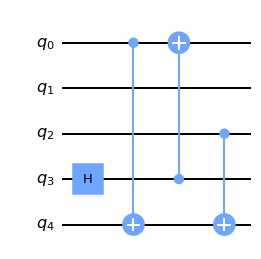

In [7]:
qc_adv5_1 = QuantumCircuit(5)
qc_adv5_1.h(3)
qc_adv5_1.cx(0,4)
qc_adv5_1.cx(3,0)
qc_adv5_1.cx(2,4)
qc_adv5_1.draw('mpl')

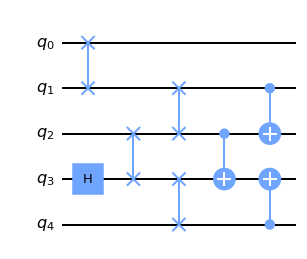

In [8]:
cmap_adv5_2 = CouplingMap(couplinglist = [[0, 1], [1, 2], [2, 3], [3, 4]])
ls = LookaheadSwap(coupling_map = cmap_adv5_2)
pass_manager = PassManager(ls)
qc_adv5_2 = pass_manager.run(qc_adv5_1)
qc_adv5_2.draw('mpl')

In [9]:
qc_adv5_2.size()

8

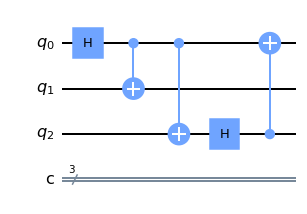

In [10]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.h(2)
qc.cx(2,0)
qc.draw('mpl')

In [11]:
qc.depth()

5